#Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/UCR Projects/DMT-Project/smoking_driking_dataset_Ver01.csv")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [ ]:
columns = df.columns

#Preprocessing

In [ ]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
df.duplicated().sum()

26

In [ ]:
df.drop_duplicates()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["DRK_YN"] = le.fit_transform(df["DRK_YN"])

In [ ]:
for i in df.columns:
  df[i] = df[i].astype('float64')

In [ ]:
df.loc[df["SMK_stat_type_cd"] == 3.0, "SMK_stat_type_cd"] = 0.0
df.loc[df["SMK_stat_type_cd"] == 2.0, "SMK_stat_type_cd"] = 0.0
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0.0,0.0
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,45.0,175.0,80.0,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0
991342,1.0,35.0,170.0,75.0,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0
991343,0.0,40.0,155.0,50.0,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,0.0,1.0
991344,1.0,25.0,175.0,60.0,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0


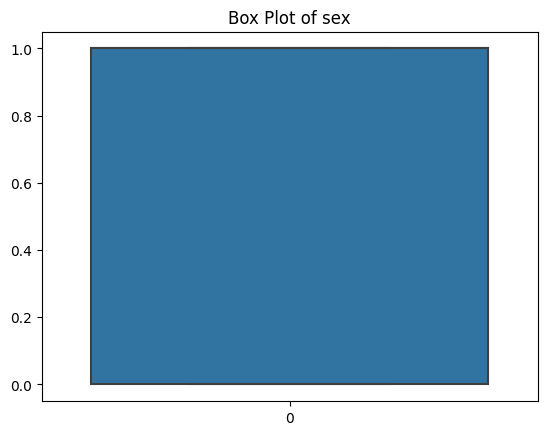

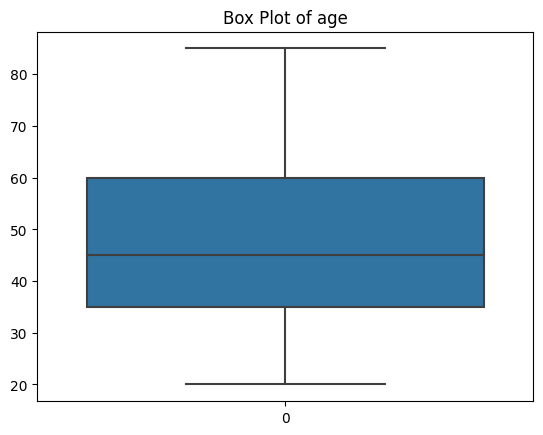

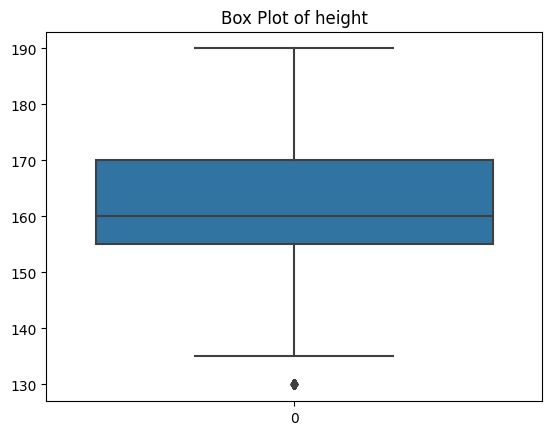

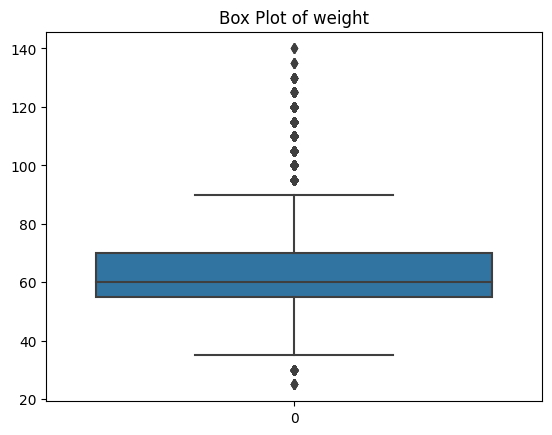

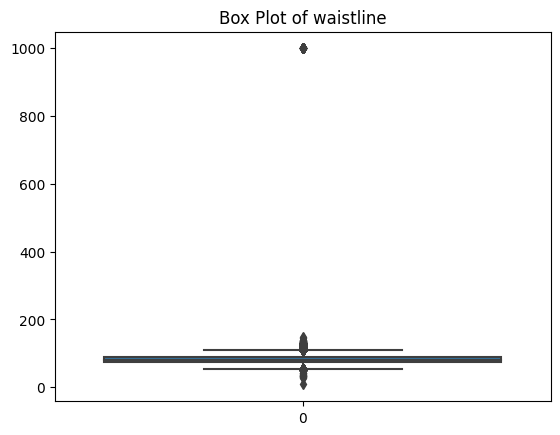

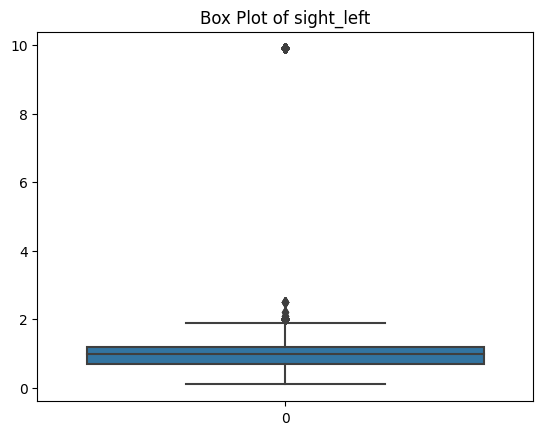

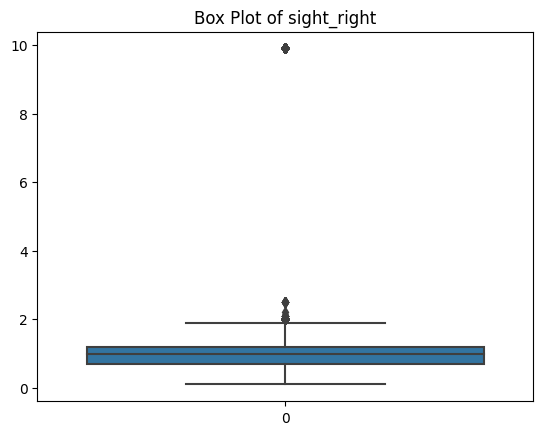

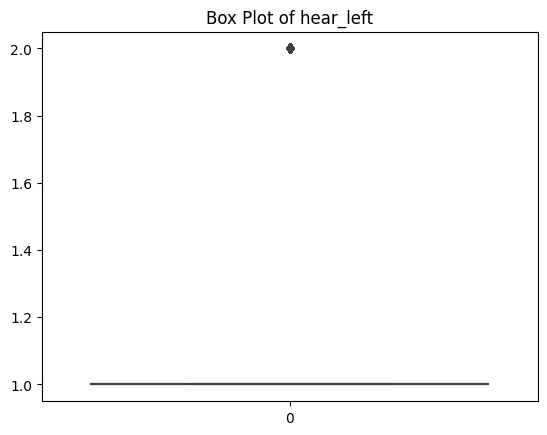

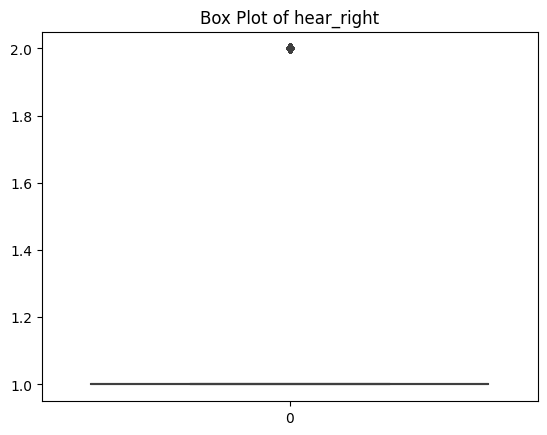

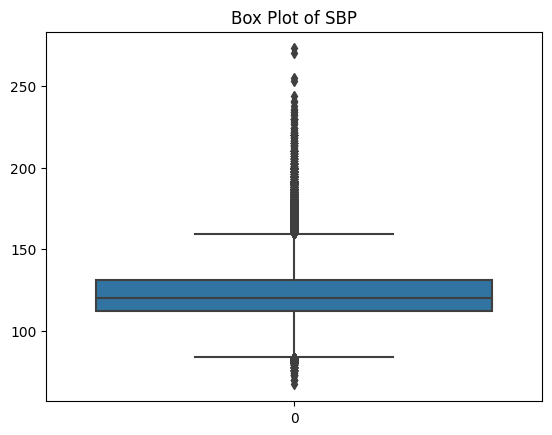

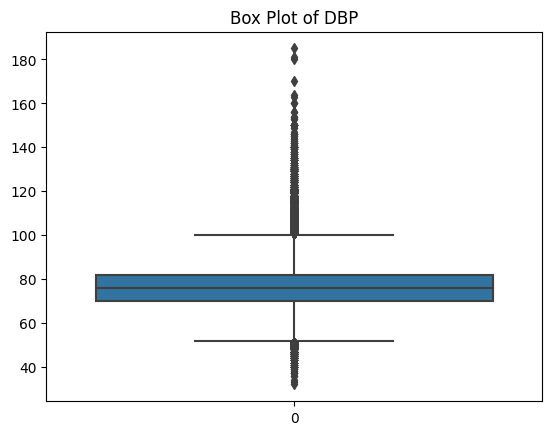

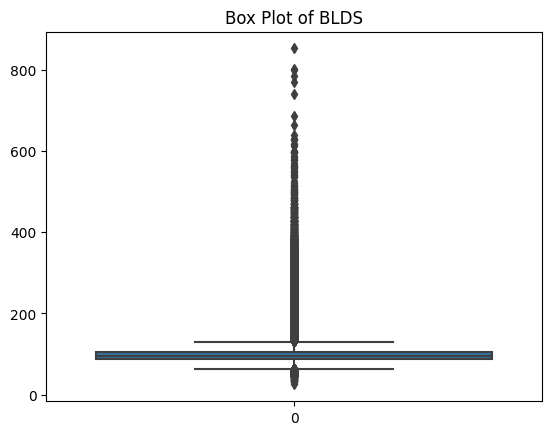

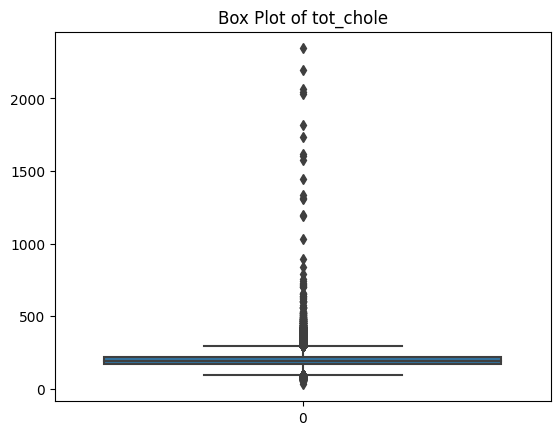

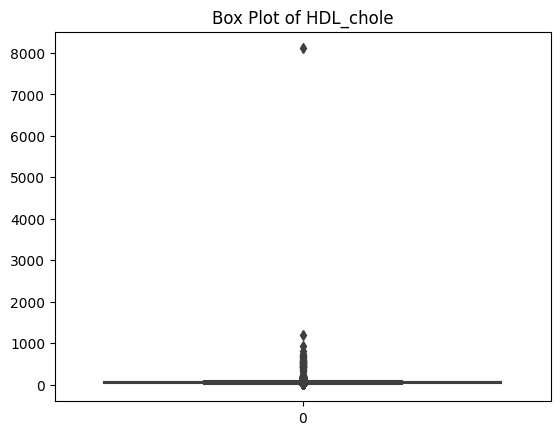

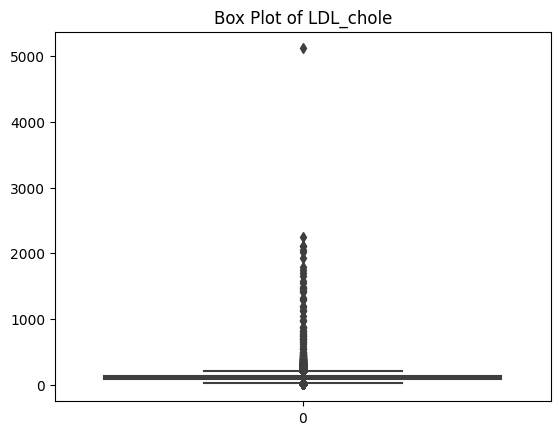

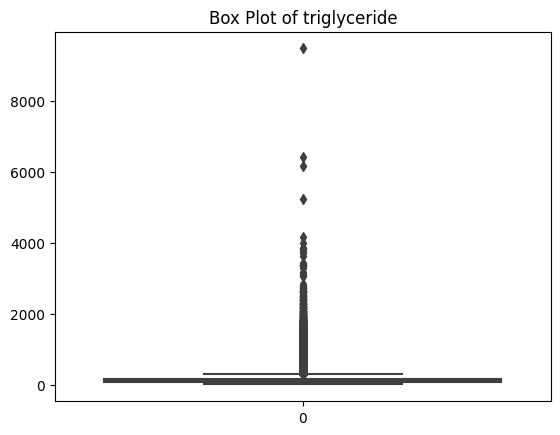

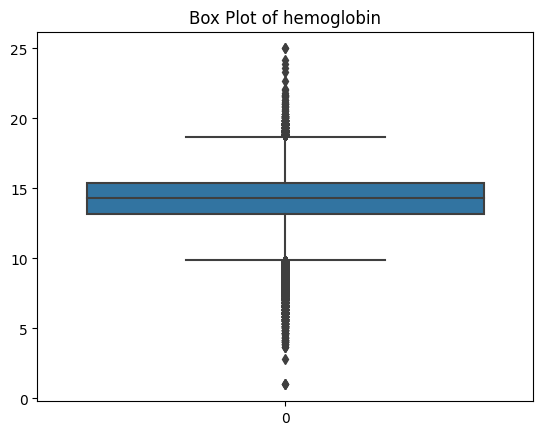

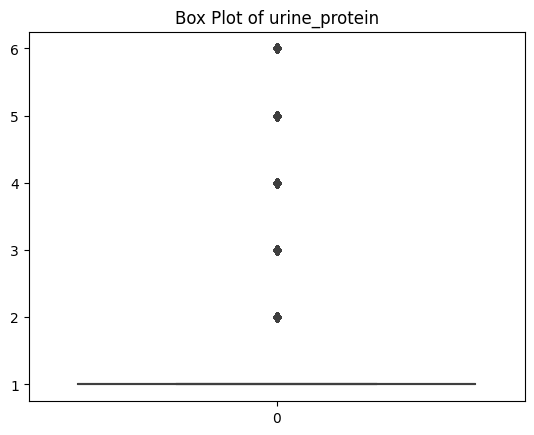

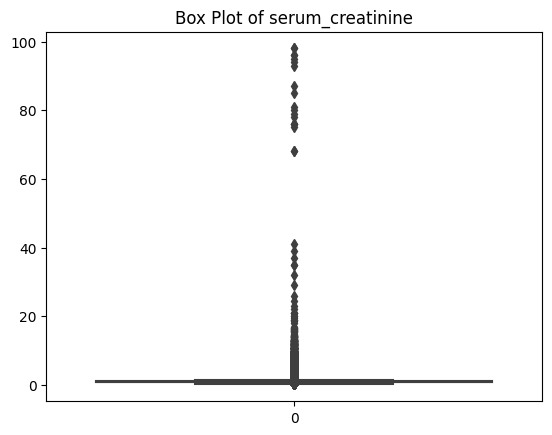

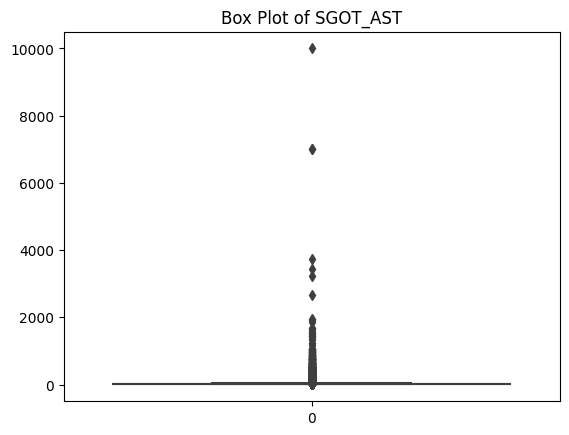

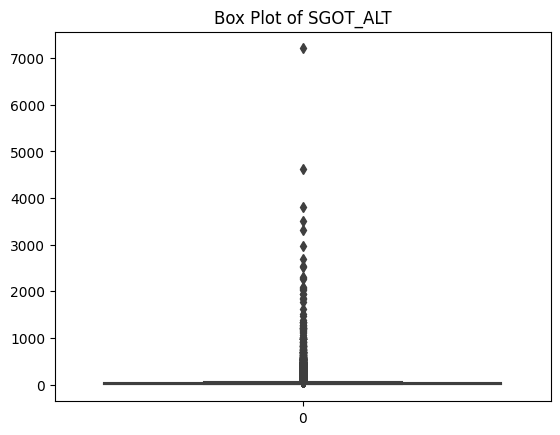

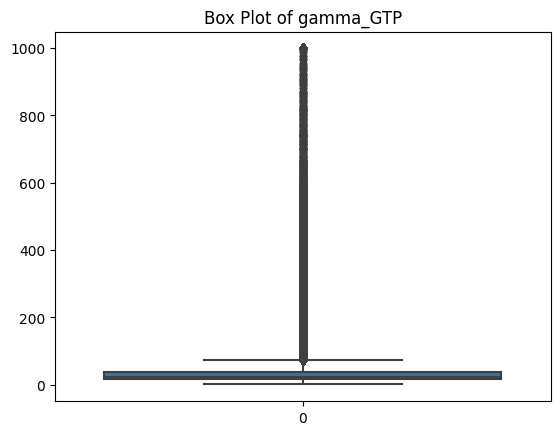

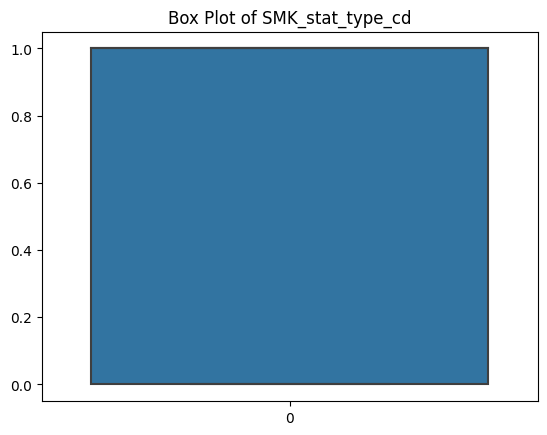

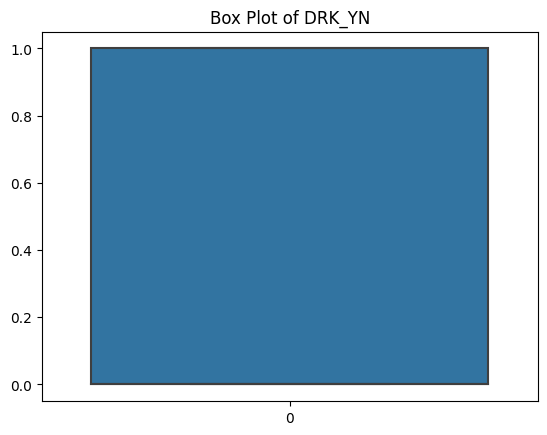

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    plt.figure()
    sns.boxplot(data=df[i])
    plt.title(f'Box Plot of {i}')
    plt.show()

In [ ]:
columns_tranformed = ['waistline','sight_left','sight_right','hear_left','hear_right','BLDS',
                      'tot_chole','HDL_chole','LDL_chole','triglyceride','urine_protein',
                      'serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']

for i in columns_tranformed:
    df[i] = np.sqrt(df[i])
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,9.486833,1.000000,1.000000,1.0,1.0,120.0,...,11.224972,9.591663,17.1,1.0,1.000000,4.582576,5.916080,6.324555,1.0,1.0
1,1.0,30.0,180.0,80.0,9.433981,0.948683,1.095445,1.0,1.0,130.0,...,12.165525,11.000000,15.8,1.0,0.948683,4.472136,6.000000,5.196152,0.0,0.0
2,1.0,40.0,165.0,75.0,9.539392,1.095445,1.224745,1.0,1.0,120.0,...,8.602325,10.198039,15.8,1.0,0.948683,6.855655,5.656854,8.246211,1.0,0.0
3,1.0,50.0,175.0,80.0,9.539392,1.224745,1.095445,1.0,1.0,145.0,...,10.198039,10.295630,17.6,1.0,1.048809,5.385165,5.830952,4.242641,1.0,0.0
4,1.0,50.0,165.0,60.0,8.944272,1.000000,1.095445,1.0,1.0,138.0,...,10.816654,10.198039,13.8,1.0,0.894427,4.358899,3.464102,5.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,45.0,175.0,80.0,9.596874,1.224745,1.224745,1.0,1.0,114.0,...,11.180340,11.489125,15.0,1.0,1.000000,5.099020,6.000000,5.196152,1.0,0.0
991342,1.0,35.0,170.0,75.0,9.273618,1.000000,1.224745,1.0,1.0,119.0,...,9.165151,6.708204,15.8,1.0,1.048809,3.741657,4.123106,3.872983,1.0,0.0
991343,0.0,40.0,155.0,50.0,8.246211,1.000000,0.836660,1.0,1.0,110.0,...,8.774964,12.529964,14.3,1.0,0.894427,5.477226,5.196152,4.123106,0.0,1.0
991344,1.0,25.0,175.0,60.0,8.485281,1.224745,1.000000,1.0,1.0,119.0,...,8.544004,7.280110,14.5,1.0,0.894427,4.582576,3.741657,4.123106,1.0,0.0


In [ ]:
corr = df.corr()
corr['SMK_stat_type_cd']

sex                -0.642598
age                 0.073802
height             -0.491795
weight             -0.395614
waistline          -0.280184
sight_left         -0.095448
sight_right        -0.096737
hear_left           0.010414
hear_right          0.012682
SBP                -0.107369
DBP                -0.142998
BLDS               -0.108436
tot_chole          -0.005722
HDL_chole           0.196042
LDL_chole           0.015089
triglyceride       -0.237070
hemoglobin         -0.464186
urine_protein      -0.018831
serum_creatinine   -0.304228
SGOT_AST           -0.126406
SGOT_ALT           -0.214921
gamma_GTP          -0.332368
SMK_stat_type_cd    1.000000
DRK_YN             -0.362274
Name: SMK_stat_type_cd, dtype: float64

In [ ]:
columns_to_be_scaled = ['age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right',
                        'SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein',
                        'serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']

In [ ]:

from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()
df[columns_to_be_scaled] = StandardScaler_object.fit_transform(df[columns_to_be_scaled])

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = df.drop("SMK_stat_type_cd",axis=1)
y = df["SMK_stat_type_cd"]

undersampler = RandomUnderSampler(sampling_strategy=1)
X, y = undersampler.fit_resample(X, y)


In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import PolynomialFeatures

# pca = PCA(n_components=3)
# X = pca.fit_transform(X)
# poly = PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)
# X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Model


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left_subtree = None
        self.right_subtree = None
        self.value = None

    def fit(self, X, y, depth=0):
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or depth == self.max_depth:
            self.value = np.mean(y)
            return

        num_features = X.shape[1]
        best_feature, best_threshold = None, None
        best_score = float('inf')

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
                    score = self._calculate_score(y[left_mask], y[right_mask])
                    if score < best_score:
                        best_score = score
                        best_feature = feature_index
                        best_threshold = threshold

        if best_score == float('inf'):
            self.value = np.mean(y)
        else:
            self.feature_index = best_feature
            self.threshold = best_threshold
            left_mask = X[:, best_feature] <= best_threshold
            self.left_subtree = DecisionTree(max_depth=self.max_depth)
            self.left_subtree.fit(X[left_mask], y[left_mask], depth + 1)

            right_mask = ~left_mask
            self.right_subtree = DecisionTree(max_depth=self.max_depth)
            self.right_subtree.fit(X[right_mask], y[right_mask], depth + 1)

    def _calculate_score(self, left_y, right_y):
        return len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)

    def predict(self, X):
        if self.value is not None:
            return np.full(X.shape[0], self.value)
        else:
            left_mask = X[:, self.feature_index] <= self.threshold
            right_mask = ~left_mask
            result = np.zeros(X.shape[0])
            result[left_mask] = self.left_subtree.predict(X[left_mask])
            result[right_mask] = self.right_subtree.predict(X[right_mask])
            return result


class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # Initialize the model with the mean of the target values
        initial_prediction = np.mean(y)
        residuals = y - initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            residuals -= self.learning_rate * tree.predict(X)

    def predict(self, X):
        predictions = np.sum([tree.predict(X) for tree in self.trees], axis=0)
        return np.round(predictions)

In [ ]:
y_train_pred_list = []
y_val_pred_list = []
y_test_pred_list = []

y_train_list = []
y_val_list = []


y_train_pred_list_sk = []
y_val_pred_list_sk = []
y_test_pred_list_sk = []

#Kfold
num_folds = 5
fold_size = len(X_train) // num_folds
X_train_cv = X_train
y_train_cv = y_train
for fold in range(num_folds):
    # Define the start and end index for the validation set
    start_val_index = fold * fold_size
    end_val_index = (fold + 1) * fold_size

    # New training set
    X_train = np.append(X_train_cv[:start_val_index], X_train_cv[end_val_index:], axis=0)
    y_train = np.append(y_train_cv[:start_val_index], y_train_cv[end_val_index:])
    y_train_list.append(y_train)

    X_val = X_train_cv[start_val_index:end_val_index]
    y_val = y_train_cv[start_val_index:end_val_index]
    y_val_list.append(y_val)

    #From Scratch Gradient boosting classifier
    gb = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
    gb.fit(X_train, y_train)
    y_train_pred = gb.predict(X_train)
    y_val_pred = gb.predict(X_val)
    y_test_pred = gb.predict(X_test)
    y_train_pred_list.append(y_train_pred)
    y_val_pred_list.append(y_val_pred)
    y_test_pred_list.append(y_test_pred)

    #Sklearn Gradient boosting classifier
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbc.fit(X_train, y_train)
    y_train_pred_sk = gbc.predict(X_train)
    y_val_pred_sk = gbc.predict(X_val)
    y_test_pred_sk = gbc.predict(X_test)
    y_train_pred_list_sk.append(y_train_pred_sk)
    y_val_pred_list_sk.append(y_val_pred_sk)
    y_test_pred_list_sk.append(y_test_pred_sk)

In [ ]:
sc=[]
sk=[]

for i in range((len(y_train_pred_list))):

  training_accuracy = accuracy_score(y_train_list[i], y_train_pred_list[i])
  sc.append(training_accuracy)
  validation_accuracy = accuracy_score(y_val_list[i], y_val_pred_list[i])
  testing_accuracy = accuracy_score(y_test, y_test_pred_list[i])

  training_report = classification_report(y_train_list[i], y_train_pred_list[i])
  validation_report = classification_report(y_val_list[i], y_val_pred_list[i])
  testing_report = classification_report(y_test, y_test_pred_list[i])

  training_accuracy_sk = accuracy_score(y_train_list[i], y_train_pred_list_sk[i])
  sk.append(training_accuracy_sk)
  validation_accuracy_sk = accuracy_score(y_val_list[i], y_val_pred_list_sk[i])
  testing_accuracy_sk = accuracy_score(y_test, y_test_pred_list_sk[i])

  training_report_sk = classification_report(y_train_list[i], y_train_pred_list_sk[i])
  validation_report_sk = classification_report(y_val_list[i], y_val_pred_list_sk[i])
  testing_report_sk = classification_report(y_test, y_test_pred_list_sk[i])

  print(f"*************************************************************************************Fold{i}*********************************************************************************************")
  print("Gradient Boosting Classifier from Scratch Model")
  print(f"Training Accuracy fold{i} scratch model: {training_accuracy:.3f}")
  print(f"Validation Accuracy fold{i} scratch model: {validation_accuracy:.3f}")
  print(f"Testing Accuracy fold{i} scratch model: {testing_accuracy:.3f}")
  print("Classification Report training scratch model:\n", training_report)
  print("Classification Report validation scratch model:\n", validation_report)
  print("Classification Report testing scratch model:\n", testing_report)
  print("Sklearn Random Forest Model")
  print(f"Training Accuracy fold{i} Sklearn model: {training_accuracy_sk:.3f}")
  print(f"Validation Accuracy fold{i} Sklearn model: {validation_accuracy_sk:.3f}")
  print(f"Testing Accuracy fold{i} Sklearn model: {testing_accuracy_sk:.3f}")
  print("Classification Report training Sklearn model:\n", training_report_sk)
  print("Classification Report validation Sklearn model:\n", validation_report_sk)
  print("Classification Report testing Sklearn model:\n", testing_report_sk)
  print("**********************************************************************************************************************************************************************************")


*************************************************************************************Fold0*********************************************************************************************
Gradient Boosting Classifier from Scratch Model
Training Accuracy fold0 scratch model: 0.845
Validation Accuracy fold0 scratch model: 0.838
Testing Accuracy fold0 scratch model: 0.817
Classification Report training scratch model:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2116
           1       0.92      0.75      0.83      2132

    accuracy                           0.84      4248
   macro avg       0.86      0.85      0.84      4248
weighted avg       0.86      0.84      0.84      4248

Classification Report validation scratch model:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       533
           1       0.91      0.75      0.82       529

    accuracy                           0.84  

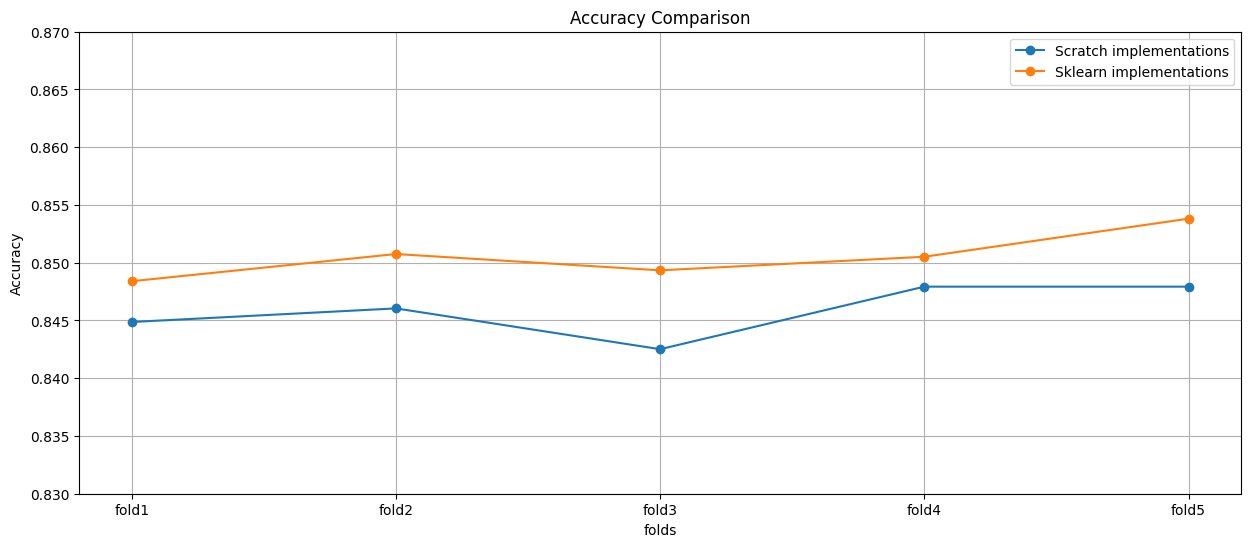

In [ ]:
import matplotlib.pyplot as plt

models = ['fold1','fold2', 'fold3', 'fold4', 'fold5']
accuracies_sc = sc

accuracies_sk = sk

plt.figure(figsize=(15, 6))

plt.plot(models, accuracies_sc, marker='o', linestyle='-',label='Scratch implementations')
plt.plot(models, accuracies_sk, marker='o', linestyle='-',label='Sklearn implementations')

plt.xlabel('folds')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.ylim(0.83, 0.87)
plt.legend()
plt.show()

#Statistical test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

In [ ]:
from scipy.stats import ttest_ind

##Scratch

In [ ]:
test1=GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
X_train = X_train.values

In [ ]:
X_test = X_test.values

In [ ]:
y_pred_scratch = test1.predict(X_test)

In [ ]:
t_statistic, p_value = ttest_ind(y_pred_scratch, y_test)

In [ ]:
print("Scratch T-statistic with ground truth:", t_statistic)
print("Scratch P-value with ground truth:", p_value)

Scratch T-statistic with ground truth: -0.994304457524959
Scratch P-value with ground truth: 0.3201804079227604


In [ ]:
accuracy_score(y_pred_scratch, y_test)

0.812390158172232

##Sklearn

In [ ]:
test2=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
test2.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_sk = test2.predict(X_test)

In [ ]:
type(y_pred_sk)

numpy.ndarray

In [ ]:
t_statistic_sk, p_value_sk = ttest_ind(y_pred_sk, y_test)

In [ ]:
print("Scratch T-statistic with ground truth:", t_statistic_sk)
print("Scratch P-value with ground truth:", p_value_sk)

Scratch T-statistic with ground truth: -5.400907871283884
Scratch P-value with ground truth: 6.968340930782369e-08


In [ ]:
accuracy_score(y_pred_sk, y_test)

0.812390158172232

In [ ]:
from tabulate import tabulate

# Display the results in a tabular form
table = [["Method", "T-Statistic", "P-Value"],
         ["GBclassifier_Scratch", t_statistic, p_value],
         ["GBClassifier_Sklearn", t_statistic_sk, p_value_sk]]

print(tabulate(table, headers="firstrow", tablefmt="grid"))


+----------------------+---------------+-------------+
| Method               |   T-Statistic |     P-Value |
+======================+===============+=============+
| GBclassifier_Scratch |     -0.994304 | 0.32018     |
+----------------------+---------------+-------------+
| GBClassifier_Sklearn |     -5.40091  | 6.96834e-08 |
+----------------------+---------------+-------------+


Trying with different n_estimators

In [ ]:
cl=[]
gbc = GradientBoostingClassifier(n_estimators=125, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred_sk1 = gbc.predict(X_test)
cl.append(accuracy_score(y_pred_sk1,y_test))

gbc4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc4.fit(X_train, y_train)
y_pred_sk4 = gbc4.predict(X_test)
cl.append(accuracy_score(y_pred_sk4,y_test))

gbc2 = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=3, random_state=42)
gbc2.fit(X_train, y_train)
y_pred_sk2 = gbc2.predict(X_test)
cl.append(accuracy_score(y_pred_sk2,y_test))

gbc3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gbc3.fit(X_train, y_train)
y_pred_sk3 = gbc3.predict(X_test)
cl.append(accuracy_score(y_pred_sk3,y_test))


In [ ]:
cl_s=[]
gbc = GradientBoosting(n_estimators=125, learning_rate=0.1, max_depth=3)
gbc.fit(X_train, y_train)
y_pred_sk1 = gbc.predict(X_test)
cl_s.append(accuracy_score(y_pred_sk1,y_test))

gbc4 = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc4.fit(X_train, y_train)
y_pred_sk4 = gbc4.predict(X_test)
cl_s.append(accuracy_score(y_pred_sk4,y_test))

gbc2 = GradientBoosting(n_estimators=75, learning_rate=0.1, max_depth=3)
gbc2.fit(X_train, y_train)
y_pred_sk2 = gbc2.predict(X_test)
cl_s.append(accuracy_score(y_pred_sk2,y_test))

gbc3 = GradientBoosting(n_estimators=50, learning_rate=0.1, max_depth=3)
gbc3.fit(X_train, y_train)
y_pred_sk3 = gbc3.predict(X_test)
cl_s.append(accuracy_score(y_pred_sk3,y_test))


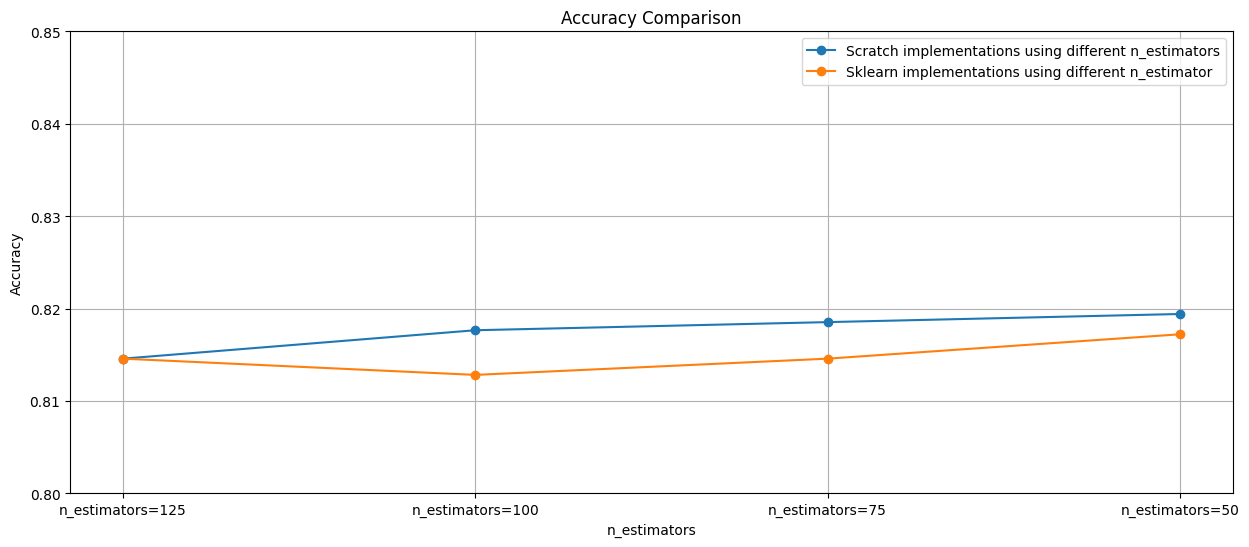

In [ ]:
import matplotlib.pyplot as plt

models = ['n_estimators=125','n_estimators=100', 'n_estimators=75', 'n_estimators=50']


plt.figure(figsize=(15, 6))

plt.plot(models, cl_s, marker='o', linestyle='-',label='Scratch implementations using different n_estimators')
plt.plot(models, cl, marker='o', linestyle='-',label='Sklearn implementations using different n_estimator')

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.ylim(0.80, 0.85)
plt.legend()
plt.show()

In [ ]:
from tabulate import tabulate

# Display the results in a tabular form
table = [["n_estimators", "GBclassifier_Scratch", "GBClassifier_Sklearn"],
         ["125", cl_s[0], cl[0]],
         ["100", cl_s[1], cl[1]],
         ["75", cl_s[2], cl[2]],
         ["50", cl_s[3], cl[3]]]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+----------------+------------------------+------------------------+
|   n_estimators |   GBclassifier_Scratch |   GBClassifier_Sklearn |
+================+========================+========================+
|            125 |               0.814587 |               0.814587 |
+----------------+------------------------+------------------------+
|            100 |               0.817663 |               0.81283  |
+----------------+------------------------+------------------------+
|             75 |               0.818541 |               0.814587 |
+----------------+------------------------+------------------------+
|             50 |               0.81942  |               0.817223 |
+----------------+------------------------+------------------------+


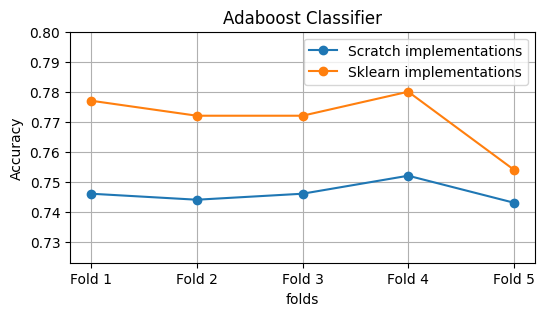

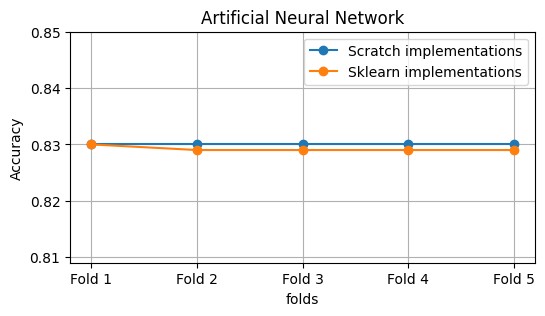

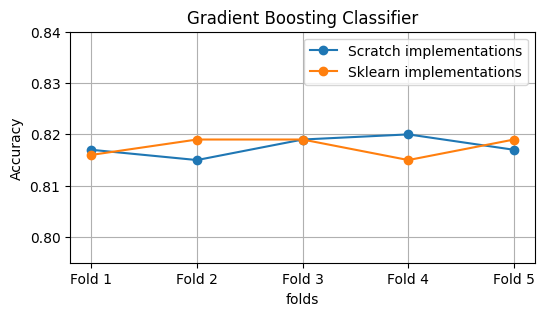

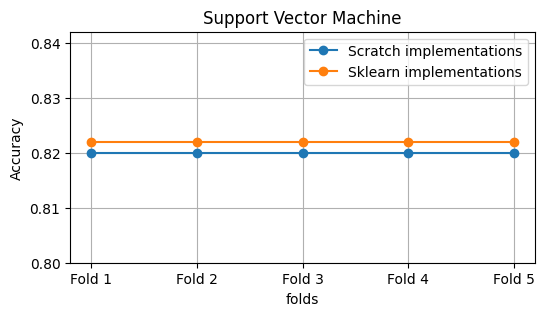

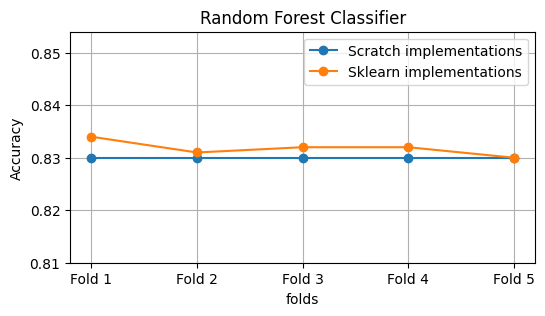

In [ ]:
import matplotlib.pyplot as plt

# Replace the placeholder values with your actual data
f1_sc_ab = [0.746, 0.744, 0.746, 0.752, 0.743]
f1_sc_nn = [0.83, 0.83, 0.83, 0.83, 0.83]
f1_sc_gb = [0.817,0.815,0.819,0.820,0.817]
f1_sc_sv = [0.82, 0.82, 0.82, 0.82, 0.82]
f1_sc_rf = [0.83, 0.83, 0.83, 0.83, 0.83]

f1_sk_ab = [0.777, 0.772, 0.772, 0.78, 0.754]
f1_sk_nn = [0.83, 0.829, 0.829, 0.829, 0.829]
f1_sk_gb = [0.816, 0.819, 0.819, 0.815, 0.819]
f1_sk_sv = [0.822, 0.822, 0.822, 0.822, 0.822]
f1_sk_rf = [0.834, 0.831, 0.832, 0.832, 0.830]

data = [f1_sc_ab, f1_sc_nn, f1_sc_gb, f1_sc_sv, f1_sc_rf]
labels = [f1_sk_ab, f1_sk_nn, f1_sk_gb, f1_sk_sv, f1_sk_rf]
lis=['Adaboost Classifier','Artificial Neural Network','Gradient Boosting Classifier','Support Vector Machine','Random Forest Classifier']
models=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

for i in range(0,5):
  accuracies_sc = data[i]
  accuracies_sk = labels[i]

  plt.figure(figsize=(6, 3))
  plt.plot(models, accuracies_sc, marker='o', linestyle='-',label='Scratch implementations')
  plt.plot(models, accuracies_sk, marker='o', linestyle='-',label='Sklearn implementations')

  plt.xlabel('folds')
  plt.ylabel('Accuracy')
  plt.title(lis[i])
  plt.grid(True)
  plt.ylim(min(min(accuracies_sc),min(accuracies_sk))-0.02, max(max(accuracies_sc),max(accuracies_sk))+0.02)
  plt.legend()
  plt.show()


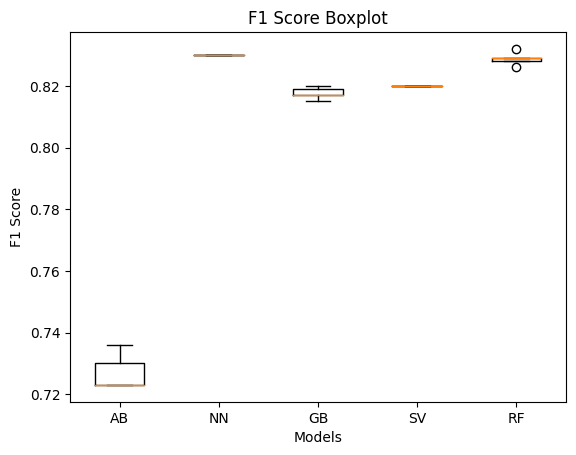

In [ ]:
import matplotlib.pyplot as plt

# Replace the placeholder values with your actual data
f1_sc_ab = [0.723, 0.730, 0.723, 0.723, 0.736]
f1_sc_nn = [0.83, 0.83, 0.83, 0.83, 0.83]
f1_sc_gb = [0.817,0.815,0.819,0.820,0.817]
f1_sc_sv = [0.82, 0.82, 0.82, 0.82, 0.82]
f1_sc_rf = [0.828, 0.826, 0.829, 0.832, 0.829]
f1_sc_rf_sk = [0.834, 0.831, 0.832, 0.832, 0.830]

data = [f1_sc_ab, f1_sc_nn, f1_sc_gb, f1_sc_sv, f1_sc_rf]

# Create a boxplot
plt.boxplot(data, labels=['AB', 'NN', 'GB', 'SV', 'RF'])
plt.title('F1 Score Boxplot')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()